# Regularization Review

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [17]:
boston = load_boston()
X = boston.data
y = boston.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

Train RMSE:  4.860238708799371
Test RMSE: 4.137655733753556


In [23]:
def model_test(model, X_train, X_test):
    lr = model
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    lr.fit(X_train, y_train)
    print("Train r2", lr.score(X_train, y_train))
    print("Test r2", lr.score(X_test, y_test))
    print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
    print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

In [24]:
model_test(LinearRegression(), X_train, X_test)

Train r2 0.7307341708880266
Test r2 0.7439867863915058
Train RMSE:  4.860238708799371
Test RMSE: 4.337689031692163


In [26]:
model_test(Ridge(), X_train, X_test)

Train r2 0.7307144805477653
Test r2 0.7442869335695661
Train RMSE:  4.86041641052404
Test RMSE: 4.335145555665421


In [28]:
model_test(Ridge(alpha=0.1), X_train, X_test)

Train r2 0.7307339640766441
Test r2 0.7440183154717183
Train RMSE:  4.860240575268088
Test RMSE: 4.33742192134561


In [30]:
model_test(Ridge(alpha = 10), X_train, X_test)

Train r2 0.7294134995248338
Test r2 0.7459264855423595
Train RMSE:  4.872143165410163
Test RMSE: 4.3212254101308005


In [31]:
from ipywidgets import interact

In [34]:
def slidin(alph):
    model_test(Ridge(alpha = alph), X_train, X_test)

In [35]:
interact(slidin, alph = (0.001, 100, .01))

Train r2 0.7178333895880218
Test r2 0.7444554102011374
Train RMSE:  4.975305911830764
Test RMSE: 4.333717214377123


<function __main__.slidin(alph)>

In [36]:
ridge_default = Ridge().fit(X_train, y_train).coef_
ridge_small = Ridge(alpha = 0.1).fit(X_train, y_train).coef_
ridge_large = Ridge(alpha = 100).fit(X_train, y_train).coef_

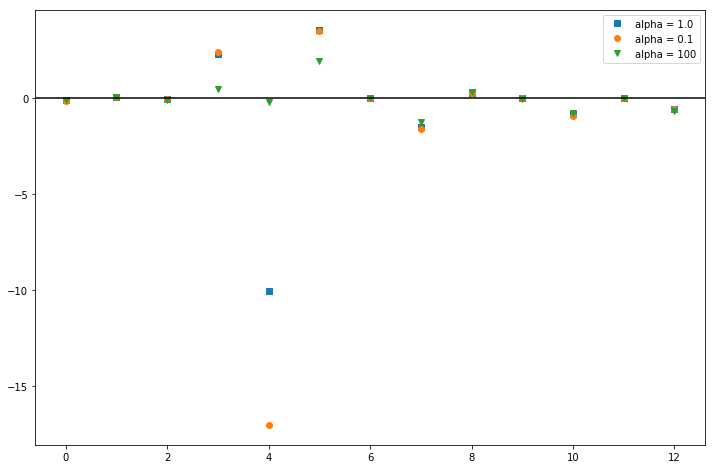

In [37]:
plt.figure(figsize = (12, 8))
plt.plot(ridge_default, 's', label = 'alpha = 1.0')
plt.plot(ridge_small, 'o', label = 'alpha = 0.1')
plt.plot(ridge_large, 'v', label = 'alpha = 100')
plt.axhline(color = 'black')
plt.legend()

In [38]:
model_test(Lasso())

TypeError: model_test() missing 2 required positional arguments: 'X_train' and 'X_test'

In [16]:
model_test(ElasticNet())

Train r2 0.2807179579050916
Test r2 0.2591671652210801
Train RMSE:  7.715934627851146
Test RMSE: 8.101271784144636


### Problem

Examine the plots of coefficients for three different values of alpha.  Compare and contrast what we see with the four models (`LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`) in terms of the values of coefficients across alpha values, and the values from model to model.

If you have time, find the ideal value for our regularization parameter using the `GridSearchCV`.

### Classification and Regularization

Here, we are focused on `LogisticRegression`, and the use of different regularization parameters and values for these parameters.  The aim is to draw connections between what happens with Regularization across our least squares strategies.

In [39]:
clf = LogisticRegression()

In [40]:
cancer = load_breast_cancer()

In [41]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#  Here, for LogReg, "C=1.0" is the hyperparameter to be tuned.  "penalty = l2" means that it's using the ridge measure of penalization.  We could change the penalty to l1 to use the lasso measure, but in either case, the thing we're tunig is C (which is analagous to alpha) 

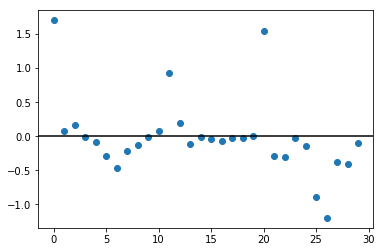

In [44]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.axhline(color = 'black')

In [22]:
clf_small = LogisticRegression(C = 0.1)
clf_small.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

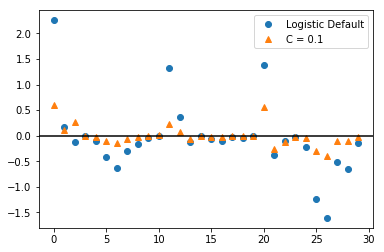

In [23]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.axhline(color = 'black')
plt.legend()

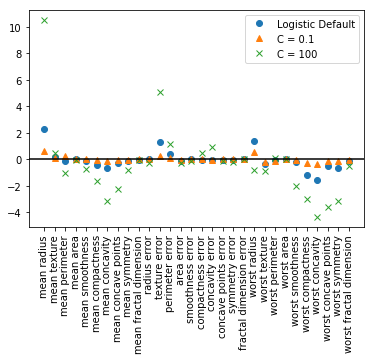

In [24]:
clf_big = LogisticRegression(C = 100)
clf_big.fit(X_train, y_train)
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.plot(clf_big.coef_.T, 'x', label = 'C = 100')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.axhline(color = 'black')
plt.legend()

### Applying L1 Regularization

In [25]:
clf_l1 = LogisticRegression(C = 1.0, penalty='l1')
clf_l1_small = LogisticRegression(C = 0.1, penalty='l1')
clf_l1_large = LogisticRegression(C = 100, penalty='l1')

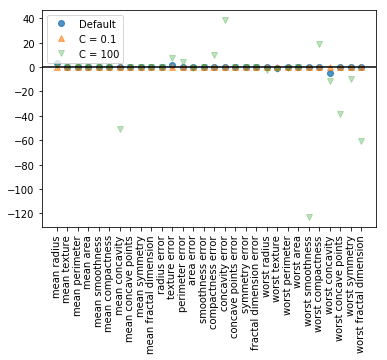

In [26]:
clf_l1.fit(X_train, y_train)
clf_l1_small.fit(X_train, y_train)
clf_l1_large.fit(X_train, y_train)

plt.plot(clf_l1.coef_.T, 'o', alpha = 0.8, label = 'Default')
plt.plot(clf_l1_small.coef_.T, '^', alpha = 0.6, label = 'C = 0.1')
plt.plot(clf_l1_large.coef_.T, 'v', alpha = 0.3, label = 'C = 100')
plt.axhline(color = 'black')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.legend()

### Takeaways

- We use regularization in both classification and regression
- Depending on the task, we want either `L1` or `L2` penalties
- We can grid search to find ideal `C`

In [51]:
from sklearn.linear_model import LogisticRegressionCV

In [52]:
clf = LogisticRegressionCV

In [53]:
clf.fit(X_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'